Importing necessary libraries.

In [ ]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

Checking for duplicates and null values.

In [ ]:
df_loaded = pd.read_csv('hr_employee.csv')
df2 = pd.read_csv('hr_employee.csv')
null_values = df_loaded.isnull().sum()
duplicates = df_loaded.duplicated().sum()



Age                           0
Attrition                     0
BusinessTravel               70
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears           120
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

Replacing Null values for numerical and categorical features.

In [ ]:

numerical_cols = df_loaded.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_loaded.select_dtypes(include=['object']).columns
#for null values
# Replace null values in numerical columns with mean
for col in numerical_cols:
    mean_value = df_loaded[col].mean()
    df_loaded[col].fillna(mean_value, inplace=True)

# Replace null values in categorical columns with mode
for col in categorical_cols:
    mode_value = df_loaded[col].mode()[0]  # Get the first mode
    df_loaded[col].fillna(mode_value, inplace=True)

<ipython-input-3-d75723c25a9b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_loaded[col].fillna(mean_value, inplace=True)
<ipython-input-3-d75723c25a9b>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
df_loaded = df_loaded.drop_duplicates(subset=None, keep='first', inplace=False)

In [ ]:
null_values = df_loaded.isnull().sum()
duplicates = df_loaded.duplicated().sum()
print( null_values)
print(duplicates)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df_loaded.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8.0,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10.0,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7.0,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8.0,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6.0,3,3,2,2,2,2


### Label Encoding the Categorical Features

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
df = df_loaded
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8.0,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10.0,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7.0,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8.0,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6.0,3,3,2,2,2,2


In [ ]:
df_loaded.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [ ]:
l = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

In [ ]:
df_loaded.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.272993,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.560327,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df[l] = df[l].apply(le.fit_transform)

In [ ]:
df['Attrition'].unique()

array([1, 0])

In [ ]:
df['BusinessTravel'].unique()

array([2, 1, 0])

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8.0,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10.0,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7.0,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8.0,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6.0,3,3,2,2,2,2


### Outliers using Standard Deviation

In [ ]:
for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
df.shape

(1362, 35)

### Standardizing the Data.

In [ ]:
scaler = preprocessing.MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.547619,1.0,1.0,0.716332,1.0,0.000000,0.25,0.2,0.0,0.000000,...,0.000000,0.0,0.000000,0.242424,0.0,0.000000,0.250000,0.285714,0.0,0.384615
1,0.738095,0.0,0.5,0.126791,0.5,0.250000,0.00,0.2,0.0,0.000484,...,1.000000,0.0,0.333333,0.303030,0.5,0.666667,0.416667,0.500000,0.1,0.538462
2,0.452381,1.0,1.0,0.910458,0.5,0.035714,0.25,0.8,0.0,0.001451,...,0.333333,0.0,0.000000,0.212121,0.5,0.666667,0.000000,0.000000,0.0,0.000000
3,0.357143,0.0,0.5,0.924069,0.5,0.071429,0.75,0.2,0.0,0.001935,...,0.666667,0.0,0.000000,0.242424,0.5,0.666667,0.333333,0.500000,0.3,0.000000
4,0.214286,0.0,1.0,0.350287,0.5,0.035714,0.00,0.6,0.0,0.002903,...,1.000000,0.0,0.333333,0.181818,0.5,0.666667,0.083333,0.142857,0.2,0.153846


In [ ]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.547619,1.0,1.0,0.716332,1.0,0.000000,0.25,0.2,0.0,0.000000,...,0.000000,0.0,0.000000,0.242424,0.0,0.000000,0.250000,0.285714,0.0,0.384615
1,0.738095,0.0,0.5,0.126791,0.5,0.250000,0.00,0.2,0.0,0.000484,...,1.000000,0.0,0.333333,0.303030,0.5,0.666667,0.416667,0.500000,0.1,0.538462
2,0.452381,1.0,1.0,0.910458,0.5,0.035714,0.25,0.8,0.0,0.001451,...,0.333333,0.0,0.000000,0.212121,0.5,0.666667,0.000000,0.000000,0.0,0.000000
3,0.357143,0.0,0.5,0.924069,0.5,0.071429,0.75,0.2,0.0,0.001935,...,0.666667,0.0,0.000000,0.242424,0.5,0.666667,0.333333,0.500000,0.3,0.000000
4,0.214286,0.0,1.0,0.350287,0.5,0.035714,0.00,0.6,0.0,0.002903,...,1.000000,0.0,0.333333,0.181818,0.5,0.666667,0.083333,0.142857,0.2,0.153846


In [ ]:
l = (df.columns).tolist()
l

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
df_scaled.columns = l
df_scaled.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.0,1.0,0.716332,1.0,0.000000,0.25,0.2,0.0,0.000000,...,0.000000,0.0,0.000000,0.242424,0.0,0.000000,0.250000,0.285714,0.0,0.384615
1,0.738095,0.0,0.5,0.126791,0.5,0.250000,0.00,0.2,0.0,0.000484,...,1.000000,0.0,0.333333,0.303030,0.5,0.666667,0.416667,0.500000,0.1,0.538462
2,0.452381,1.0,1.0,0.910458,0.5,0.035714,0.25,0.8,0.0,0.001451,...,0.333333,0.0,0.000000,0.212121,0.5,0.666667,0.000000,0.000000,0.0,0.000000
3,0.357143,0.0,0.5,0.924069,0.5,0.071429,0.75,0.2,0.0,0.001935,...,0.666667,0.0,0.000000,0.242424,0.5,0.666667,0.333333,0.500000,0.3,0.000000
4,0.214286,0.0,1.0,0.350287,0.5,0.035714,0.00,0.6,0.0,0.002903,...,1.000000,0.0,0.333333,0.181818,0.5,0.666667,0.083333,0.142857,0.2,0.153846


Coverting Attrition value from float to int.

In [ ]:
df_scaled['Attrition'] = df_scaled['Attrition'].astype('Int64')
df_scaled.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1,1.0,0.716332,1.0,0.000000,0.25,0.2,0.0,0.000000,...,0.000000,0.0,0.000000,0.242424,0.0,0.000000,0.250000,0.285714,0.0,0.384615
1,0.738095,0,0.5,0.126791,0.5,0.250000,0.00,0.2,0.0,0.000484,...,1.000000,0.0,0.333333,0.303030,0.5,0.666667,0.416667,0.500000,0.1,0.538462
2,0.452381,1,1.0,0.910458,0.5,0.035714,0.25,0.8,0.0,0.001451,...,0.333333,0.0,0.000000,0.212121,0.5,0.666667,0.000000,0.000000,0.0,0.000000
3,0.357143,0,0.5,0.924069,0.5,0.071429,0.75,0.2,0.0,0.001935,...,0.666667,0.0,0.000000,0.242424,0.5,0.666667,0.333333,0.500000,0.3,0.000000
4,0.214286,0,1.0,0.350287,0.5,0.035714,0.00,0.6,0.0,0.002903,...,1.000000,0.0,0.333333,0.181818,0.5,0.666667,0.083333,0.142857,0.2,0.153846


### Data Analysis

In [ ]:
!pip3 install mxnet-mkl==1.6.0 numpy==1.23.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 55.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.16 requires numpy>=1.24, but you have numpy 1.23.1 which is incompatible.
albumentations 1.4.15 requires numpy>=1.24.4, but you have numpy 1.23.1 which is incompatible.
bigframes 1.19.0 requires numpy>=1.24.0, but you have numpy 1.23.1 which is incompatible.
chex 0.1.87 requires numpy>=1.24.1, but you have numpy 1.23.1 which is incompatibl

<ipython-input-22-815a49b7b7e3>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


<Axes: >

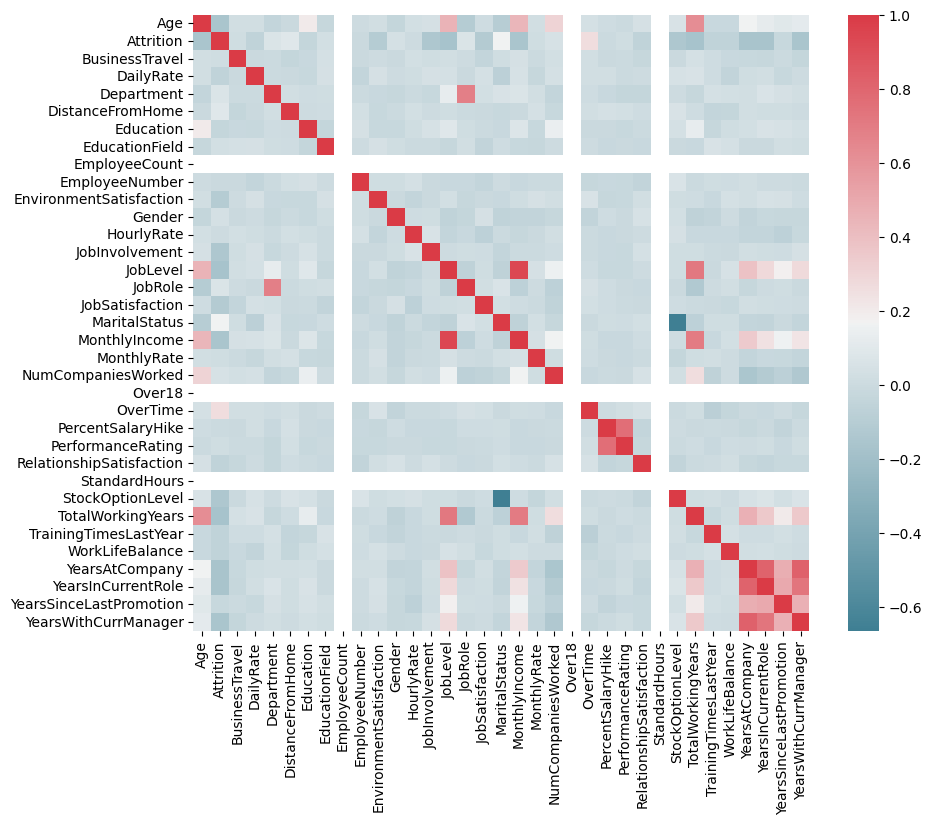

In [ ]:
import numpy as np
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Univariate Analysis

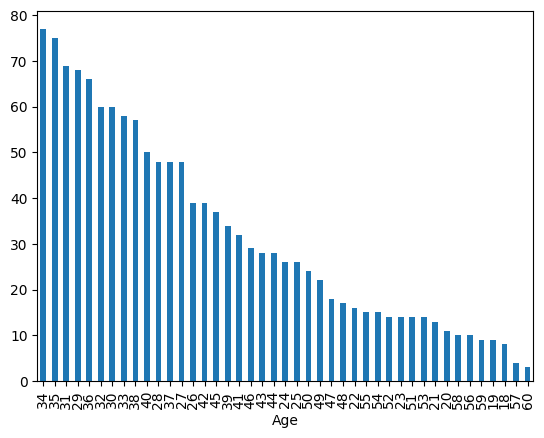

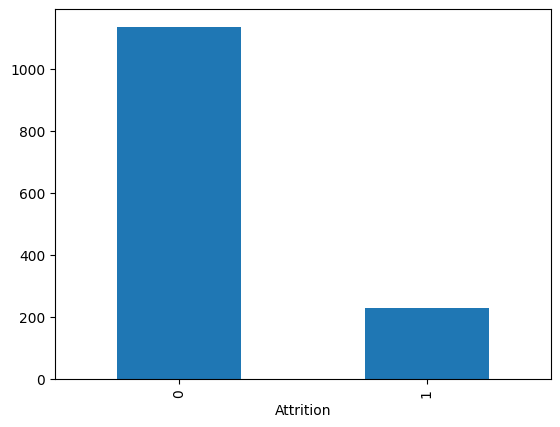

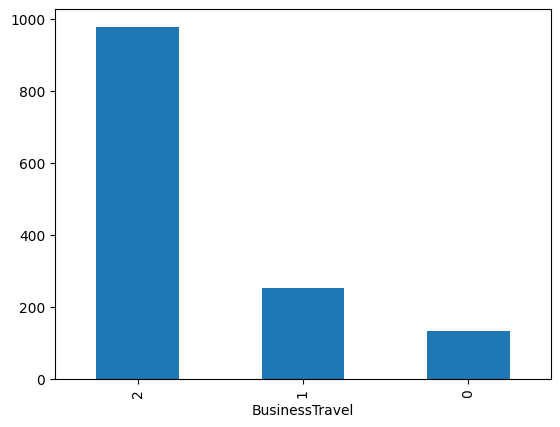

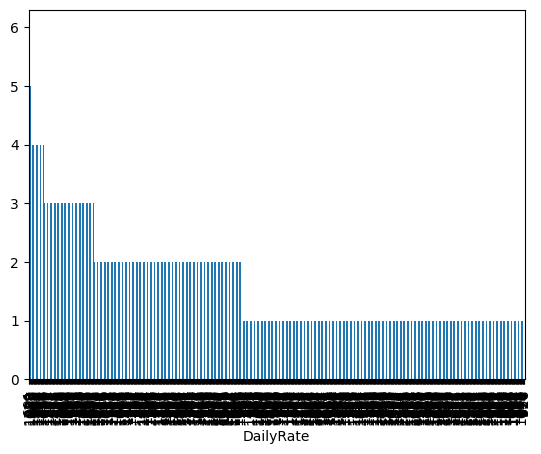

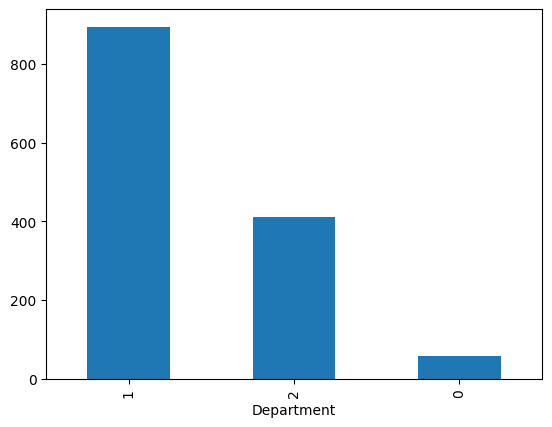

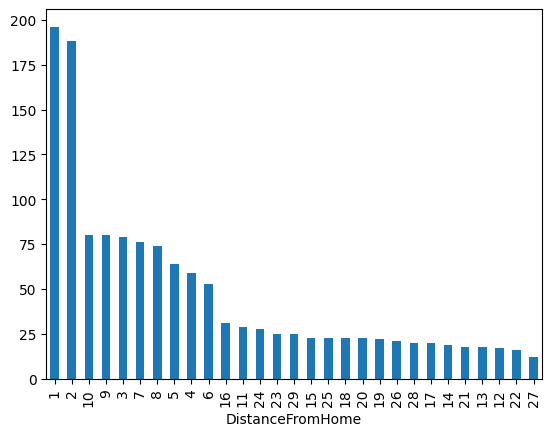

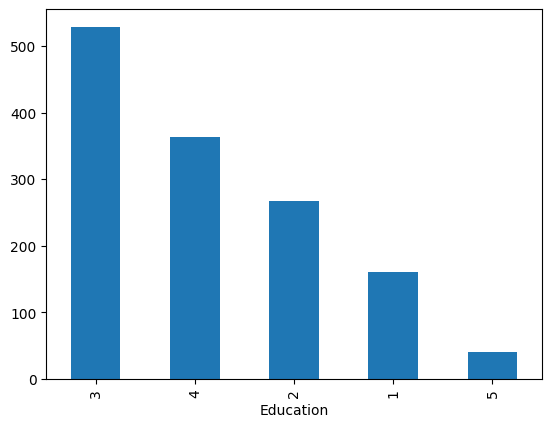

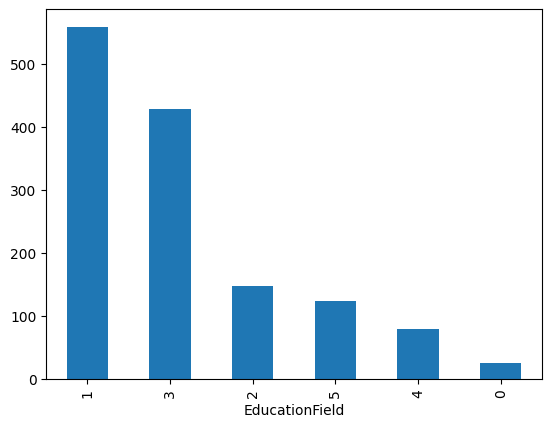

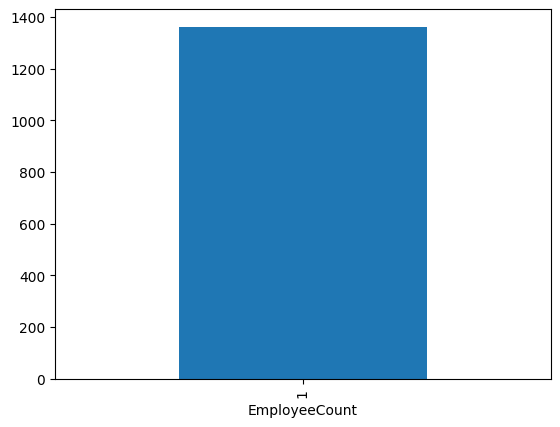

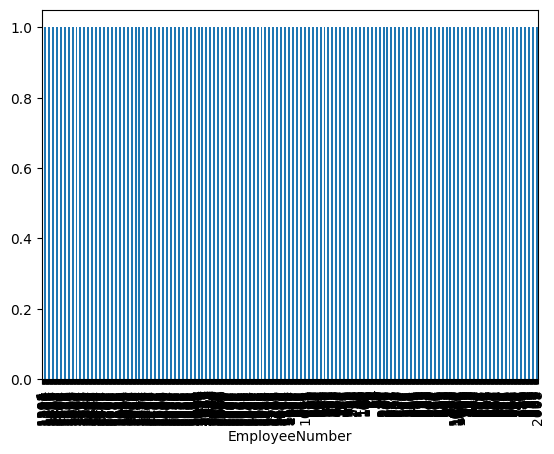

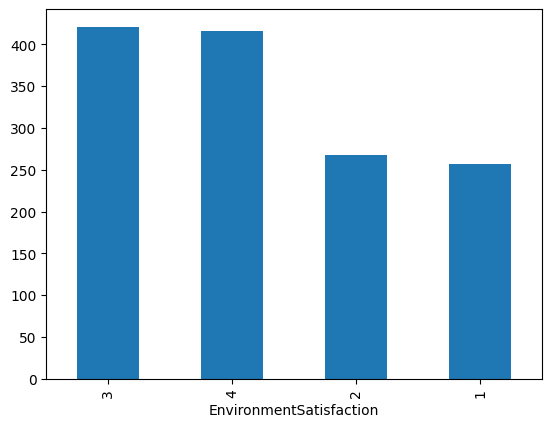

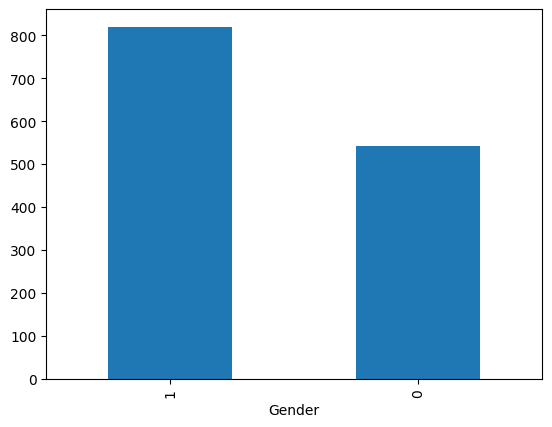

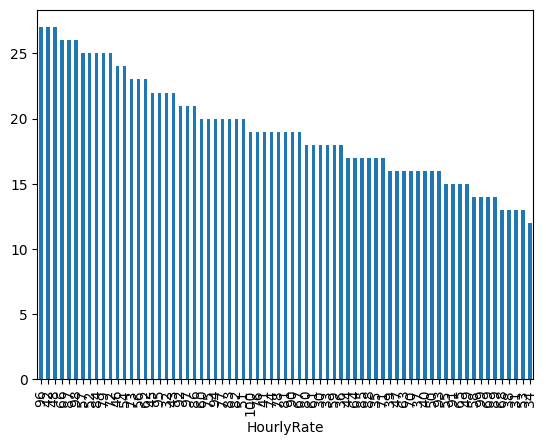

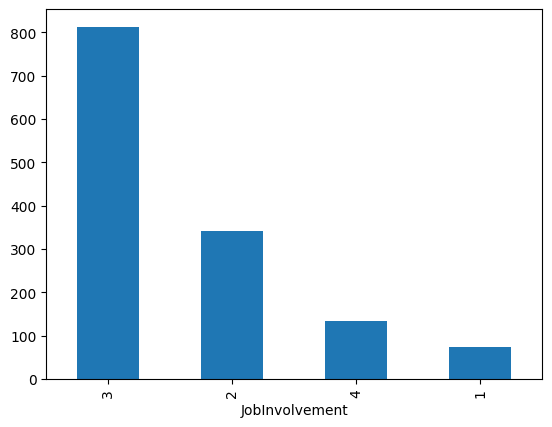

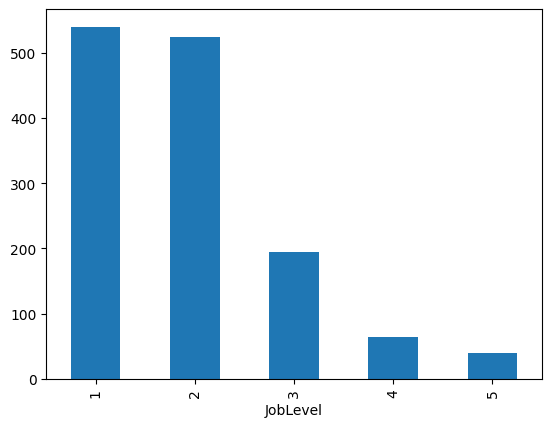

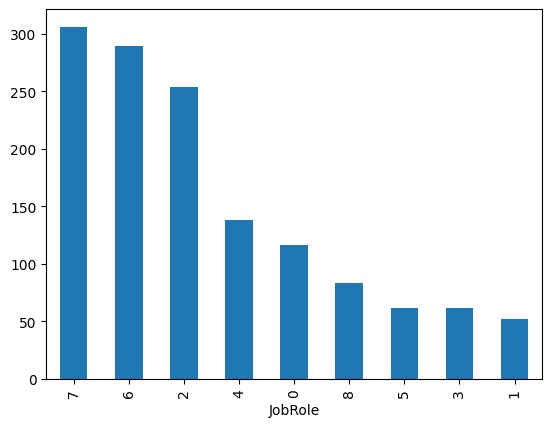

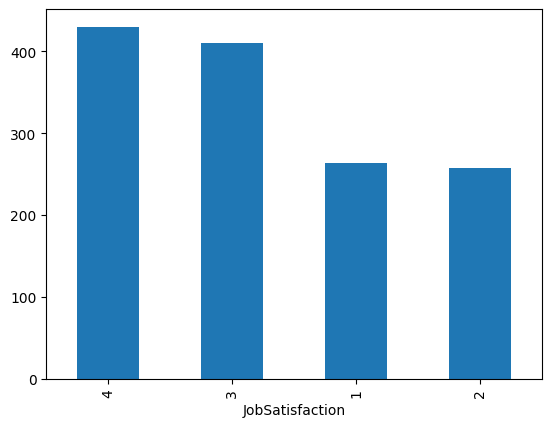

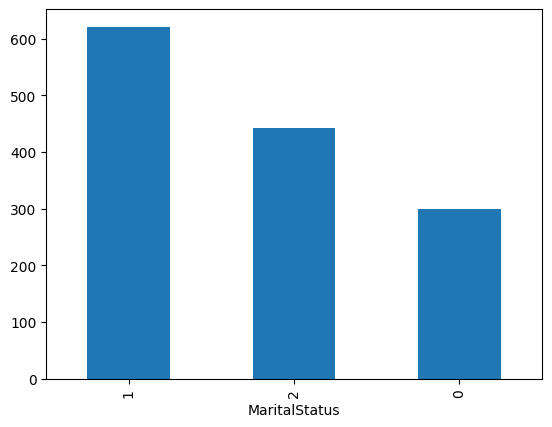

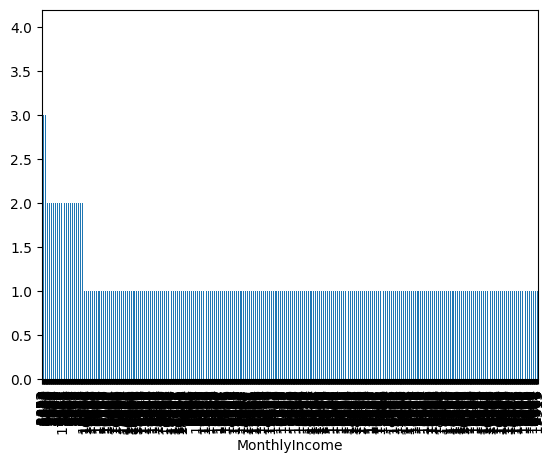

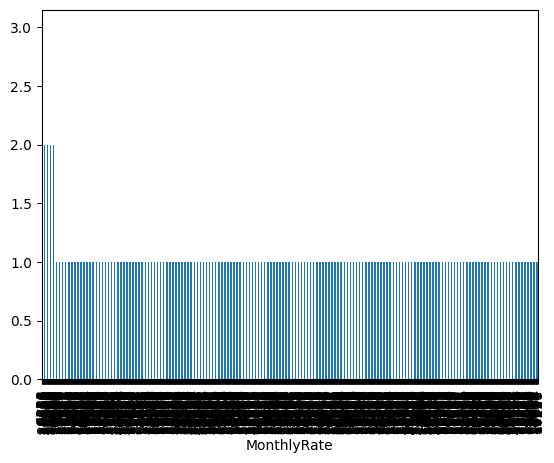

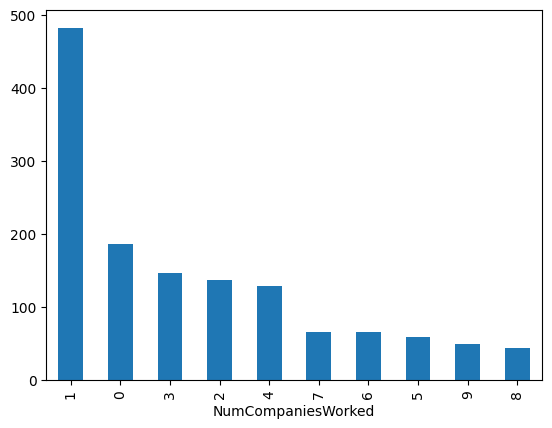

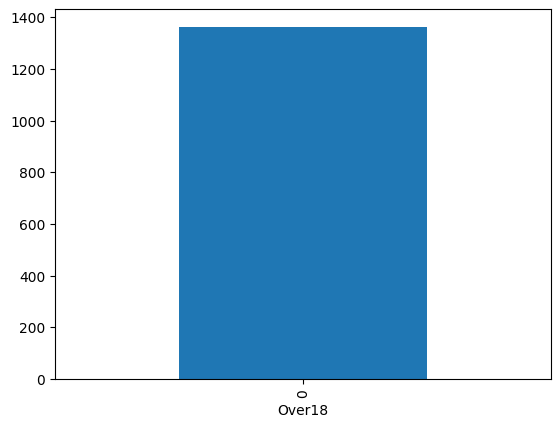

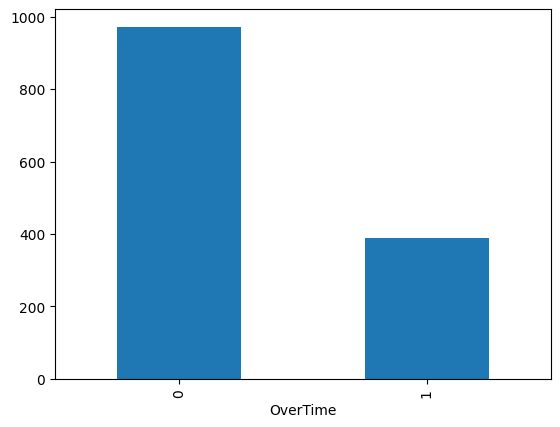

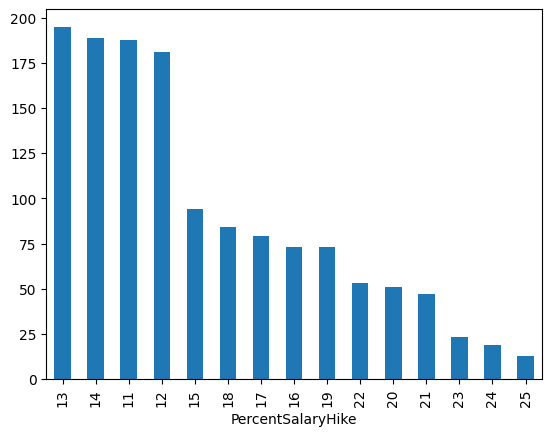

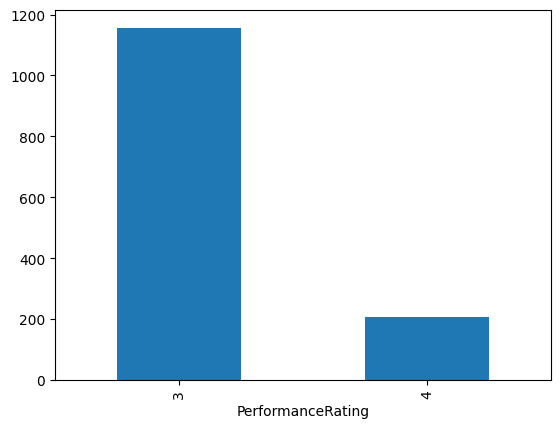

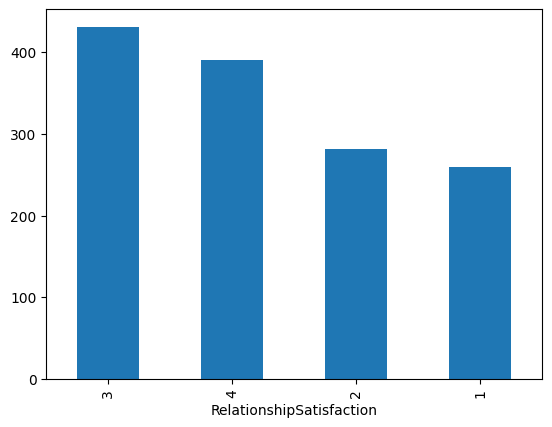

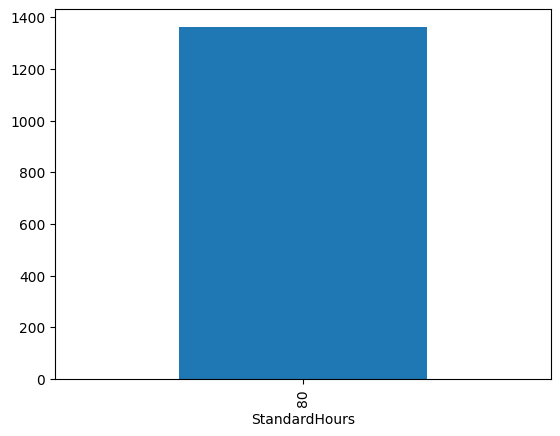

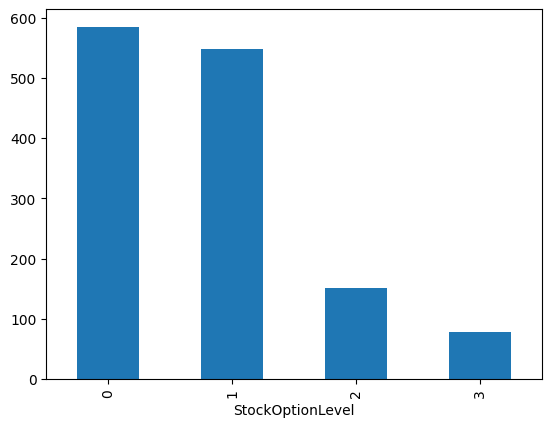

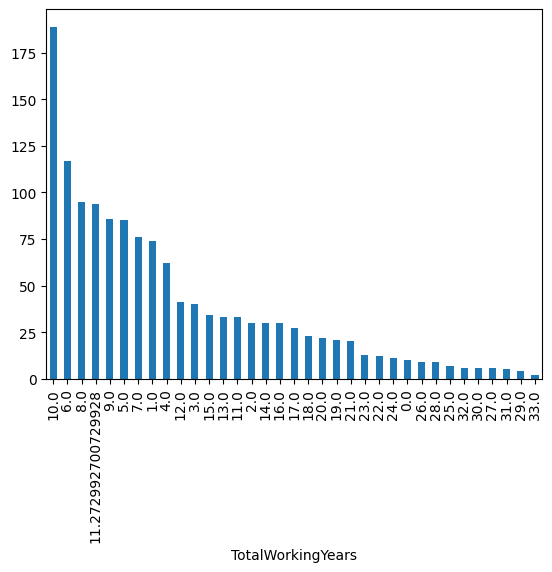

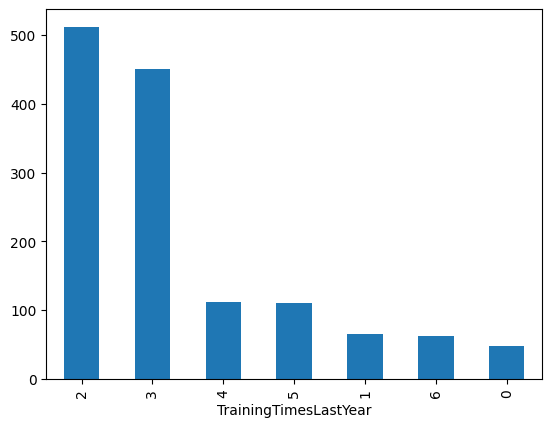

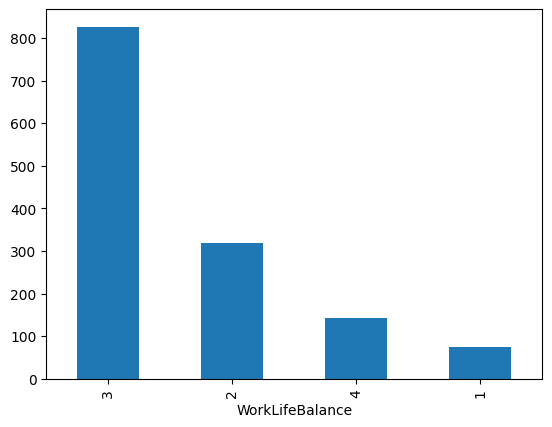

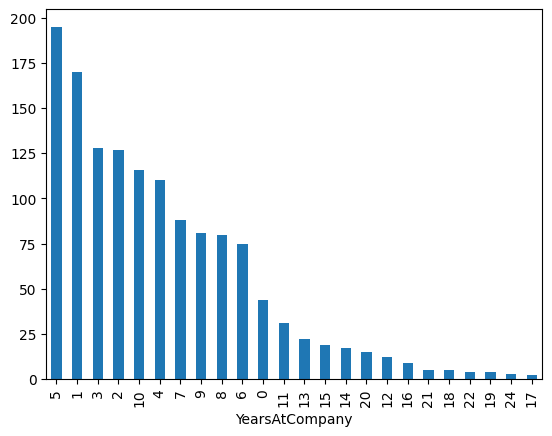

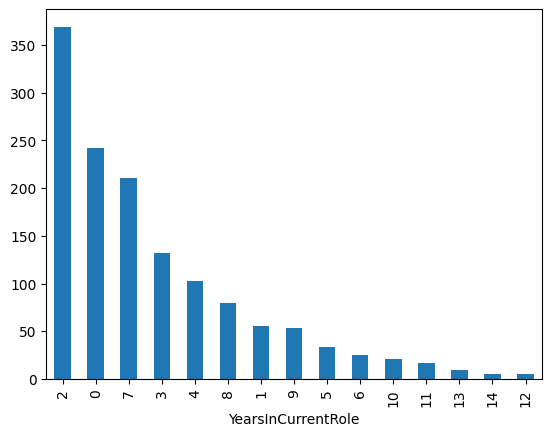

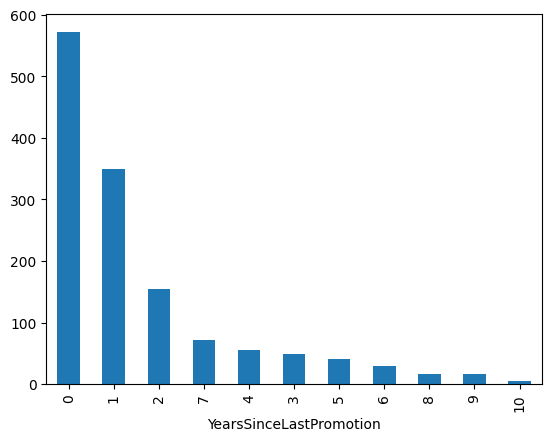

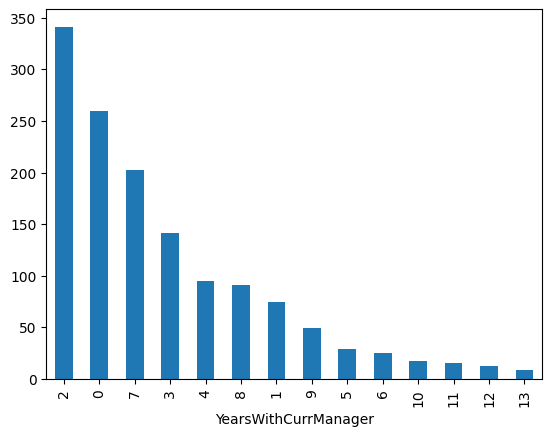

In [ ]:
for x in df.columns:
  df[x].value_counts().plot.bar()
  plt.show()

Splitting Data into Features and Target Variable

## Data Training on current data.

In [ ]:
X = df_scaled.drop('Attrition', axis=1)
y = df_scaled['Attrition']

Splitting into Training and Test Sets (80% Train, 20% Test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Display the shapes of training and test sets to ensure proper splitting

In [ ]:
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)

Training Features Shape: (1089, 34)
Test Features Shape: (273, 34)
Training Labels Shape: (1089,)
Test Labels Shape: (273,)


### Linear regression model

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)


Evaluating the Linear Regression Model.

In [ ]:
print("Linear Regression - Mean Squared Error:", mean_squared_error(y_test, y_pred_lin))
print("Linear Regression - R^2 Score:", r2_score(y_test, y_pred_lin))

Linear Regression - Mean Squared Error: 0.12555756871312662
Linear Regression - R^2 Score: 0.21954294923931506


### Logistic Regression

In [ ]:
logRegmodel = LogisticRegression()
logRegmodel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_log = logRegmodel.predict(X_test)
accLog = accuracy_score(y_test, y_pred_log)
print("Accuracy for Logistic Regression Model: ", accLog)

Accuracy for Logistic Regression Model:  0.8608058608058609


In [ ]:
print("Linear Regression - Mean Squared Error:", mean_squared_error(y_test, y_pred_log))
print("Linear Regression - R^2 Score:", r2_score(y_test, y_pred_log))

Linear Regression - Mean Squared Error: 0.1391941391941392
Linear Regression - R^2 Score: 0.13477898248540465


In [ ]:

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Confusion Matrix:
 [[213   5]
 [ 33  22]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       218
         1.0       0.81      0.40      0.54        55

    accuracy                           0.86       273
   macro avg       0.84      0.69      0.73       273
weighted avg       0.86      0.86      0.84       273



### Support Vector Machine

In [ ]:
# depVar = df.iloc[:, :-1]
# indVar = df.iloc[:, 1]

In [ ]:
# indVar

In [ ]:
svmModel = svm.SVC(kernel='linear')
svmModel.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score
pred_svm = svmModel.predict(X_test)
accSVM = accuracy_score(y_test, pred_svm)
print(accSVM)

0.8424908424908425


<Axes: >

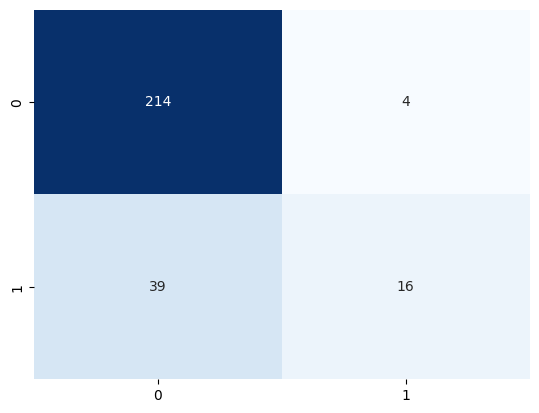

In [ ]:
cfm_svm = confusion_matrix(y_test, pred_svm)
sns.heatmap(cfm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)

In [ ]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       218
         1.0       0.80      0.29      0.43        55

    accuracy                           0.84       273
   macro avg       0.82      0.64      0.67       273
weighted avg       0.84      0.84      0.81       273



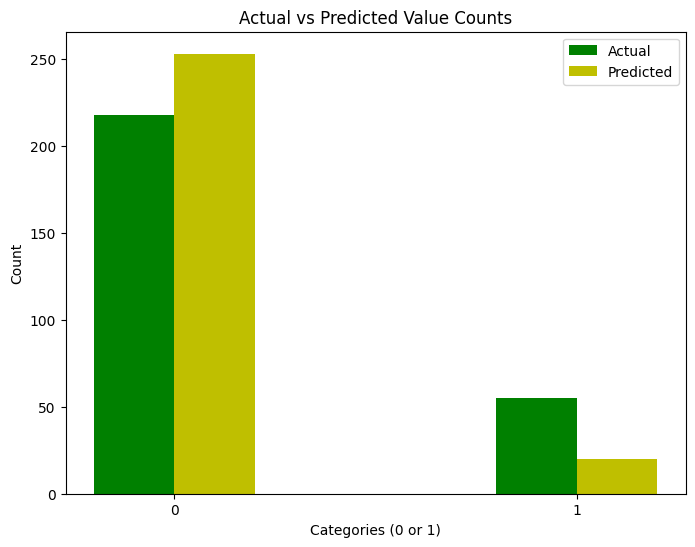

In [ ]:
# import matplotlib.pyplot as plt
# x1 = y_test
# x2 = pred_svm
# # plt.plot(x1, range(len(x1)))
# plt.bar(x1, range(len(x1)))
# plt.bar(x2, range(len(x2)))

# # plt.plot(x2, range(len(x2)))
# plt.show()

categories = [0, 1]
actual_counts = [sum(y_test == cat) for cat in categories]
predicted_counts = [sum(pred_svm == cat) for cat in categories]

plt.figure(figsize=(8, 6))
bar_width = 0.2  #
x = range(len(categories))

plt.bar(x, actual_counts, width=bar_width, label='Actual', color='g')

plt.bar([p + bar_width for p in x], predicted_counts, width=bar_width, label='Predicted', color='y')

plt.xticks([p + bar_width/2 for p in x], categories)
plt.xlabel("Categories (0 or 1)")
plt.ylabel("Count")
plt.title("Actual vs Predicted Value Counts")
plt.legend()


plt.show()

### Decision Trees

In [ ]:
def train_decision_tree(X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    #classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    #confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Visualization
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Create bar plots for Actual vs. Predicted
    categories = [0, 1]  # Assumes binary classification (0 and 1)
    actual_counts = [sum(y_test == cat) for cat in categories]
    predicted_counts = [sum(y_pred == cat) for cat in categories]

    # Bar plot for actual vs predicted
    plt.figure(figsize=(8, 6))
    bar_width = 0.35  #
    x = range(len(categories))

    # Plot actual values
    plt.bar(x, actual_counts, width=bar_width, label='Actual', color='b')

    # Plot predicted value
    plt.bar([p + bar_width for p in x], predicted_counts, width=bar_width, label='Predicted', color='r')

    plt.xticks([p + bar_width/2 for p in x], categories)
    plt.xlabel("Categories (0 or 1)")
    plt.ylabel("Count")
    plt.title("Actual vs Predicted Value Counts")
    plt.legend()


    plt.show()

    return model, y_pred, accuracy

Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86       218
         1.0       0.44      0.45      0.45        55

    accuracy                           0.77       273
   macro avg       0.65      0.65      0.65       273
weighted avg       0.78      0.77      0.77       273


Confusion Matrix:
[[186  32]
 [ 30  25]]


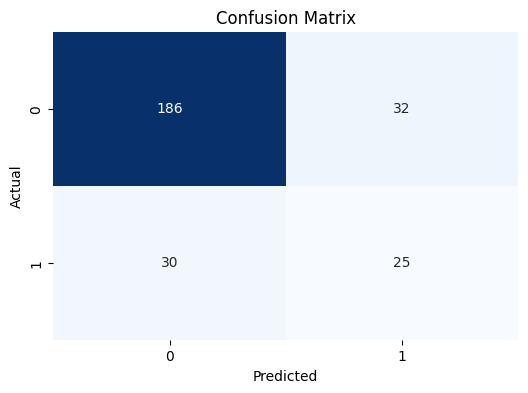

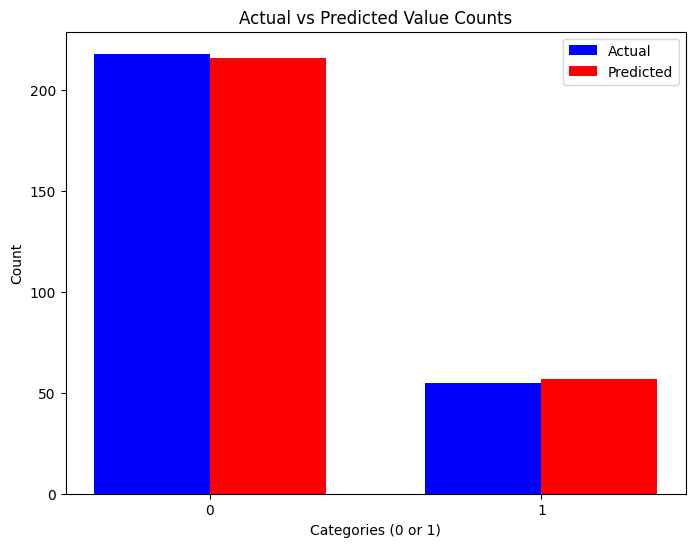

(DecisionTreeClassifier(random_state=42),
 array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 1., 0., 0.

In [ ]:
train_decision_tree(X_train, X_test, y_train, y_test)

### Random Forest Regression

In [ ]:

model0 = RandomForestRegressor(n_estimators=300, random_state=42)
model0.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [ ]:
y_pred_reg = model0.predict(X_test)
y_pred_reg

array([0.51      , 0.42333333, 0.19333333, 0.01      , 0.11      ,
       0.14      , 0.03333333, 0.29666667, 0.36666667, 0.02333333,
       0.07      , 0.18666667, 0.02333333, 0.08666667, 0.39333333,
       0.06333333, 0.09      , 0.71666667, 0.05666667, 0.02666667,
       0.27333333, 0.34333333, 0.16333333, 0.04      , 0.05666667,
       0.07      , 0.13666667, 0.11333333, 0.01333333, 0.01      ,
       0.1       , 0.21666667, 0.21333333, 0.07      , 0.03333333,
       0.1       , 0.41333333, 0.31333333, 0.05666667, 0.02333333,
       0.14333333, 0.14      , 0.18      , 0.09      , 0.16      ,
       0.02333333, 0.01666667, 0.28333333, 0.61333333, 0.79666667,
       0.51      , 0.58333333, 0.2       , 0.18666667, 0.06333333,
       0.02      , 0.07      , 0.16666667, 0.11      , 0.05      ,
       0.01666667, 0.06333333, 0.21666667, 0.05333333, 0.05333333,
       0.27333333, 0.18333333, 0.11333333, 0.05      , 0.18333333,
       0.03      , 0.34      , 0.26666667, 0.30666667, 0.30666

In [ ]:
mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.12
R-squared: 0.28


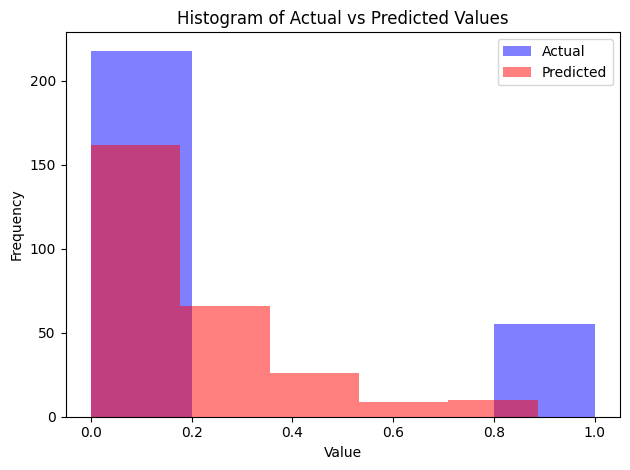

In [ ]:
plt.hist(y_test, bins=5, alpha=0.5, label='Actual', color='blue')

# Histogram for predicted values
plt.hist(y_pred_reg, bins=5, alpha=0.5, label='Predicted', color='red')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Labels')
plt.title('Histogram of Actual vs Predicted Values')

# Adding legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Random Forest classification

In [ ]:
# Train the model on the training data
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred_class = model1.predict(X_test)
y_pred_class

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [ ]:
# Evaluate the model performance
accuracy_rf = accuracy_score(y_test, y_pred_class)
conf_matrix = confusion_matrix(y_test, y_pred_class)
class_report = classification_report(y_test, y_pred_class)

print(f"Accuracy: {accuracy_rf * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 82.05%
Confusion Matrix:
 [[216   2]
 [ 47   8]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.99      0.90       218
         1.0       0.80      0.15      0.25        55

    accuracy                           0.82       273
   macro avg       0.81      0.57      0.57       273
weighted avg       0.82      0.82      0.77       273



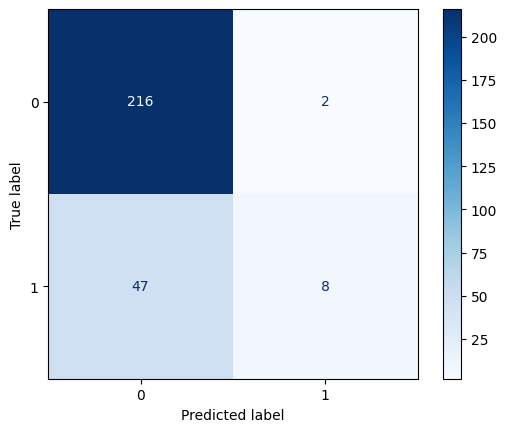

In [ ]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix )
disp.plot(cmap=plt.cm.Blues)


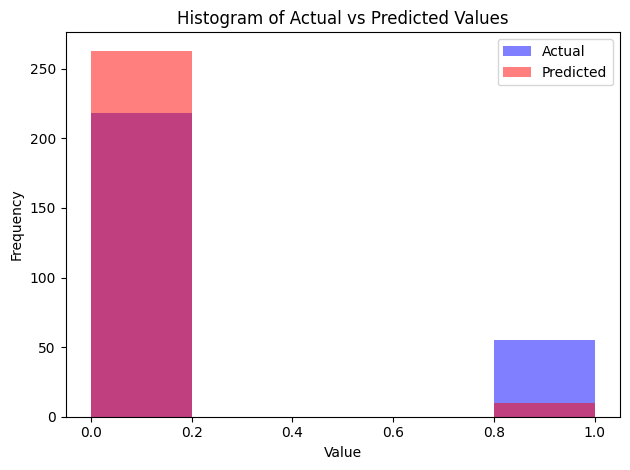

In [ ]:
plt.hist(y_test, bins=5, alpha=0.5, label='Actual', color='blue')

# Histogram for predicted values
plt.hist(y_pred_class, bins=5, alpha=0.5, label='Predicted', color='red')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Labels')
plt.title('Histogram of Actual vs Predicted Values')

# Adding legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Balancing the data for better recall score.

Using SMOTE for Balancing. (Oversampling)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '1': 172
Before OverSampling, counts of label '0': 917 



In [ ]:
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train.ravel())


<ipython-input-50-cabbd5248d76>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train.ravel())


In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_bal.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_bal.shape))

After OverSampling, the shape of train_X: (1834, 34)
After OverSampling, the shape of train_y: (1834,) 



In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_bal == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_bal == 0)))

After OverSampling, counts of label '1': 917
After OverSampling, counts of label '0': 917


In [ ]:
X_test_bal, y_test_bal = sm.fit_resample(X_test, y_test.ravel())

print('After SMOTE over sampling, the shape of X: {}'.format(X_test_bal.shape))
print('After SMOTE over Sampling, the shape of y: {} \n'.format(y_test_bal.shape))

After SMOTE over sampling, the shape of X: (436, 34)
After SMOTE over Sampling, the shape of y: (436,) 



<ipython-input-53-6831dabb8538>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_test_bal, y_test_bal = sm.fit_resample(X_test, y_test.ravel())


### Linear Regression Model

In [ ]:
lin_model_bal = LinearRegression()
lin_model_bal.fit(X_train_bal, y_train_bal)
y_pred_lin_bal = lin_model_bal.predict(X_test_bal)

In [ ]:
print("Linear Regression - Mean Squared Error:", mean_squared_error(y_test_bal, y_pred_lin_bal))
print("Linear Regression - R^2 Score:", r2_score(y_test_bal, y_pred_lin_bal))

Linear Regression - Mean Squared Error: 0.1656390168178296
Linear Regression - R^2 Score: 0.33744393272868156


### Logistic Regression Model

In [ ]:
logRegmodel_bal = LogisticRegression()
logRegmodel_bal.fit(X_train_bal, y_train_bal)

LogisticRegression()

In [ ]:
y_pred_log_bal = logRegmodel_bal.predict(X_test_bal)
accLog_bal = accuracy_score(y_test_bal, y_pred_log_bal)
print("Accuracy for Logistic Regression Model: ", accLog_bal)

Accuracy for Logistic Regression Model:  0.7729357798165137


In [ ]:
print("Logistic Regression - Mean Squared Error:", mean_squared_error(y_test_bal, y_pred_log_bal))
print("Logistic Regression - R^2 Score:", r2_score(y_test_bal, y_pred_log_bal))

Logistic Regression - Mean Squared Error: 0.22706422018348624
Logistic Regression - R^2 Score: 0.09174311926605505


<Axes: >

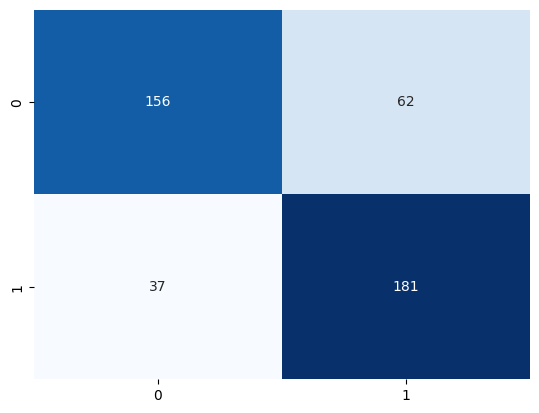

In [ ]:
cfm_log_bal = confusion_matrix(y_test_bal, y_pred_log_bal)
sns.heatmap(cfm_log_bal, annot=True, fmt="d", cmap="Blues", cbar=False)

In [ ]:
print(classification_report(y_test_bal, y_pred_log_bal))

              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76       218
         1.0       0.74      0.83      0.79       218

    accuracy                           0.77       436
   macro avg       0.78      0.77      0.77       436
weighted avg       0.78      0.77      0.77       436



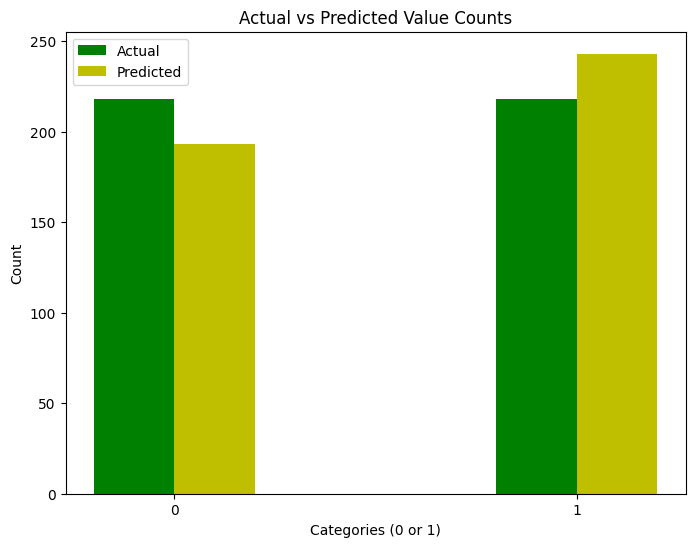

In [ ]:
categories = [0, 1]
actual_counts = [sum(y_test_bal == cat) for cat in categories]
predicted_counts = [sum(y_pred_log_bal == cat) for cat in categories]

plt.figure(figsize=(8, 6))
bar_width = 0.2  #
x = range(len(categories))

plt.bar(x, actual_counts, width=bar_width, label='Actual', color='g')

plt.bar([p + bar_width for p in x], predicted_counts, width=bar_width, label='Predicted', color='y')

plt.xticks([p + bar_width/2 for p in x], categories)
plt.xlabel("Categories (0 or 1)")
plt.ylabel("Count")
plt.title("Actual vs Predicted Value Counts")
plt.legend()


plt.show()

### Support Vector Machines

In [ ]:
svmModel_bal = svm.SVC(kernel='linear')
svmModel_bal.fit(X_train_bal, y_train_bal)

SVC(kernel='linear')

In [ ]:
pred_svm_bal = svmModel_bal.predict(X_test_bal)
accSVM_bal = accuracy_score(y_test_bal, pred_svm_bal)
print(accSVM_bal)

0.7798165137614679


<Axes: >

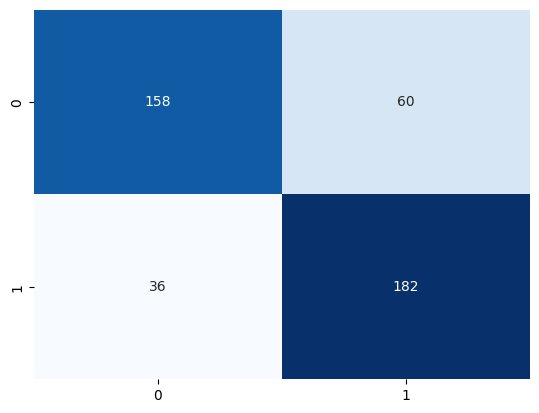

In [ ]:
cfm_svm_bal = confusion_matrix(y_test_bal, pred_svm_bal)
sns.heatmap(cfm_svm_bal, annot=True, fmt="d", cmap="Blues", cbar=False)

In [ ]:
print(classification_report(y_test_bal, pred_svm_bal))

              precision    recall  f1-score   support

         0.0       0.81      0.72      0.77       218
         1.0       0.75      0.83      0.79       218

    accuracy                           0.78       436
   macro avg       0.78      0.78      0.78       436
weighted avg       0.78      0.78      0.78       436



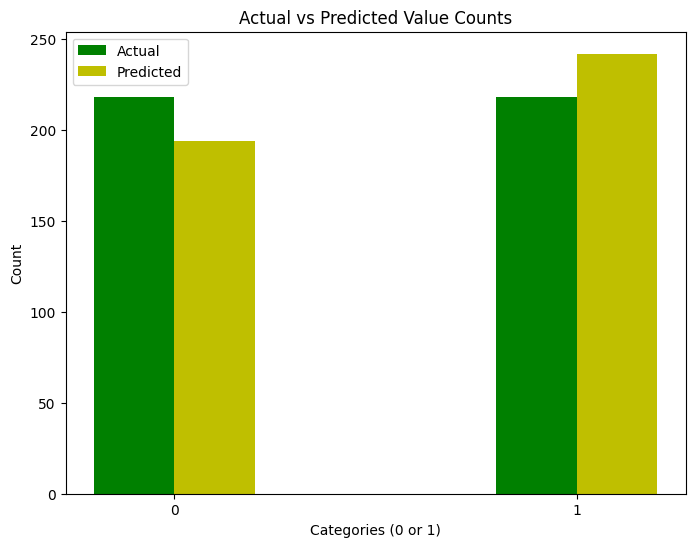

In [ ]:
categories = [0, 1]
actual_counts = [sum(y_test_bal == cat) for cat in categories]
predicted_counts = [sum(pred_svm_bal == cat) for cat in categories]

plt.figure(figsize=(8, 6))
bar_width = 0.2  #
x = range(len(categories))

plt.bar(x, actual_counts, width=bar_width, label='Actual', color='g')

plt.bar([p + bar_width for p in x], predicted_counts, width=bar_width, label='Predicted', color='y')

plt.xticks([p + bar_width/2 for p in x], categories)
plt.xlabel("Categories (0 or 1)")
plt.ylabel("Count")
plt.title("Actual vs Predicted Value Counts")
plt.legend()


plt.show()

### Decision Trees

In [ ]:
def train_decision_tree_bal(X_train_bal, X_test_bal, y_train_bal, y_test_bal):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train_bal, y_train_bal)
    y_pred_bal = model.predict(X_test_bal)

    # accuracy
    accuracy = accuracy_score(y_test_bal, y_pred_bal)
    print(f'Accuracy: {accuracy:.2f}')

    #classification report
    print("\nClassification Report:")
    print(classification_report(y_test_bal, y_pred_bal))

    #confusion matrix
    cm = confusion_matrix(y_test_bal, y_pred_bal)
    print("\nConfusion Matrix:")
    print(cm)

    # Visualization
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Create bar plots for Actual vs. Predicted
    categories = [0, 1]  # Assumes binary classification (0 and 1)
    actual_counts = [sum(y_test_bal == cat) for cat in categories]
    predicted_counts = [sum(y_pred_bal == cat) for cat in categories]

    # Bar plot for actual vs predicted
    plt.figure(figsize=(8, 6))
    bar_width = 0.35  #
    x = range(len(categories))

    # Plot actual values
    plt.bar(x, actual_counts, width=bar_width, label='Actual', color='b')

    # Plot predicted value
    plt.bar([p + bar_width for p in x], predicted_counts, width=bar_width, label='Predicted', color='r')

    plt.xticks([p + bar_width/2 for p in x], categories)
    plt.xlabel("Categories (0 or 1)")
    plt.ylabel("Count")
    plt.title("Actual vs Predicted Value Counts")
    plt.legend()


    plt.show()

    return model, y_pred_bal, accuracy

Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80       218
         1.0       0.83      0.72      0.77       218

    accuracy                           0.79       436
   macro avg       0.79      0.79      0.79       436
weighted avg       0.79      0.79      0.79       436


Confusion Matrix:
[[185  33]
 [ 60 158]]


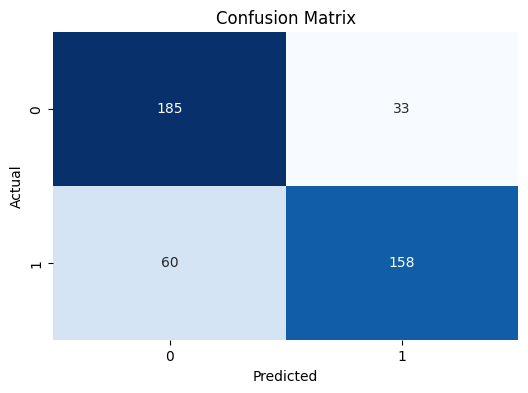

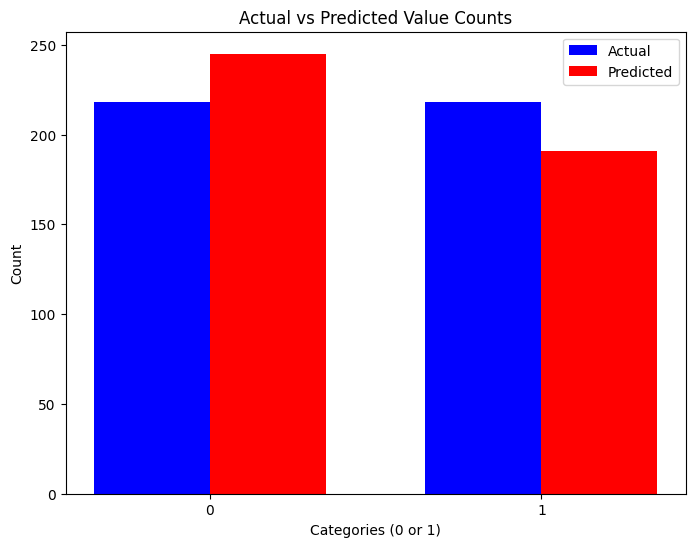

(DecisionTreeClassifier(random_state=42),
 array([0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0.

In [ ]:
train_decision_tree_bal(X_train_bal, X_test_bal, y_train_bal, y_test_bal)

### Random Forest Classifier

In [ ]:
# Train the model on the training data
rand_model_bal = RandomForestClassifier(n_estimators=100, random_state=42)
rand_model_bal.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred_class_bal = rand_model_bal.predict(X_test_bal)
y_pred_class_bal

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [ ]:
# Evaluate the model performance
accuracy_rf_bal = accuracy_score(y_test_bal, y_pred_class_bal)
conf_matrix_bal = confusion_matrix(y_test_bal, y_pred_class_bal)
class_report_bal = classification_report(y_test_bal, y_pred_class_bal)

print(f"Accuracy: {accuracy_rf_bal * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix_bal)
print("Classification Report:\n", class_report_bal)

Accuracy: 87.84%
Confusion Matrix:
 [[213   5]
 [ 48 170]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.98      0.89       218
         1.0       0.97      0.78      0.87       218

    accuracy                           0.88       436
   macro avg       0.89      0.88      0.88       436
weighted avg       0.89      0.88      0.88       436



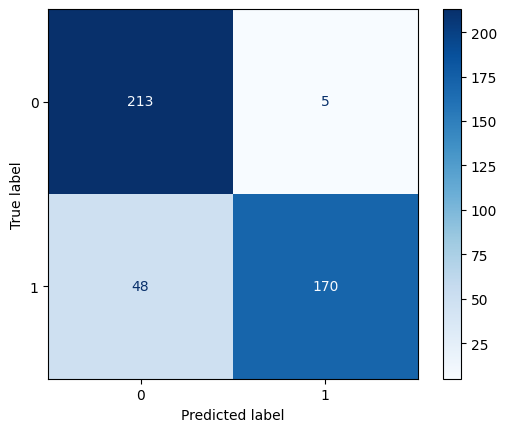

In [ ]:
# Plot confusion matrix
disp_bal = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_bal )
disp_bal.plot(cmap=plt.cm.Blues)


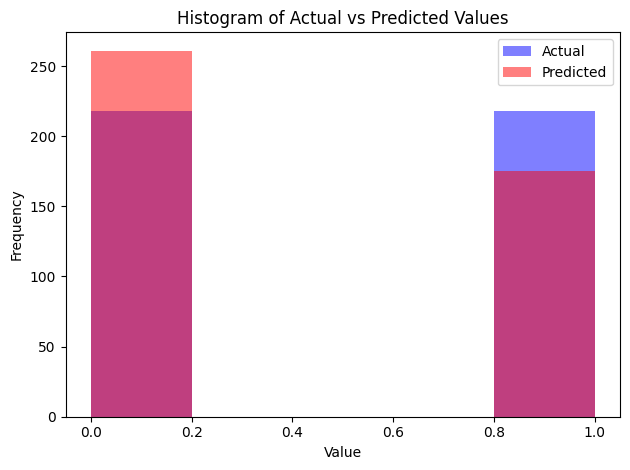

In [ ]:
plt.hist(y_test_bal, bins=5, alpha=0.5, label='Actual', color='blue')

# Histogram for predicted values
plt.hist(y_pred_class_bal, bins=5, alpha=0.5, label='Predicted', color='red')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Labels')
plt.title('Histogram of Actual vs Predicted Values')

# Adding legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

## Feature Selection

In [ ]:
#

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression


X1 = df.drop(["Attrition"], axis = 1)
y1 = df["Attrition"]

feature_selector = SelectKBest(f_regression, k = "all")
fit = feature_selector.fit(X1,y1)

p_values = pd.DataFrame(fit.pvalues_)
scores = pd.DataFrame(fit.scores_)
input_variable_names = pd.DataFrame(X1.columns)
summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
summary_stats.columns = ["input_variable", "p_value", "f_score"]
summary_stats.sort_values(by = "p_value", inplace = True)

p_value_threshold = 0.05
score_threshold = 5

selected_variables = summary_stats.loc[(summary_stats["f_score"] >= score_threshold) &
                                       (summary_stats["p_value"] <= p_value_threshold)]
selected_variables = selected_variables["input_variable"].tolist()
X_new = X1[selected_variables]

In [ ]:
selected_variables

['OverTime',
 'TotalWorkingYears',
 'JobLevel',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'MaritalStatus',
 'MonthlyIncome',
 'YearsWithCurrManager',
 'Age',
 'StockOptionLevel',
 'JobInvolvement',
 'JobSatisfaction',
 'EnvironmentSatisfaction',
 'DistanceFromHome',
 'Department',
 'JobRole']

In [ ]:
len(selected_variables)

16

In [ ]:
X_new

,OverTime,TotalWorkingYears,JobLevel,YearsAtCompany,YearsInCurrentRole,MaritalStatus,MonthlyIncome,YearsWithCurrManager,Age,StockOptionLevel,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,Department,JobRole
0,1,8.0,2,6,4,2,5993,5,41,0,3,4,2,1,2,7
1,0,10.0,2,10,7,1,5130,7,49,1,2,2,3,8,1,6
2,1,7.0,1,0,0,2,2090,0,37,0,2,3,4,2,1,2
3,1,8.0,1,8,7,1,2909,0,33,0,3,3,4,3,1,6
4,0,6.0,1,2,2,1,3468,2,27,1,3,2,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,17.0,2,5,2,1,2571,3,36,1,4,4,3,23,1,2
1466,0,9.0,3,7,7,1,9991,7,39,1,2,1,4,6,1,0
1467,1,6.0,2,6,2,1,6142,3,27,1,4,2,2,4,1,4
1468,0,17.0,2,9,6,1,5390,8,49,0,2,2,4,2,2,7


In [ ]:
y1

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [ ]:
# trying on selected features
X_trainnew, X_testnew, y_trainnew, y_testnew = train_test_split(X_new, y1, test_size=0.2, random_state=42)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_trainnew == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_trainnew == 0)))

Before OverSampling, counts of label '1': 172
Before OverSampling, counts of label '0': 917 



In [ ]:
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
# from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_trainnew_bal, y_trainnew_bal = sm.fit_resample(X_trainnew, y_trainnew.ravel())


<ipython-input-79-c6361eac4178>:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_trainnew_bal, y_trainnew_bal = sm.fit_resample(X_trainnew, y_trainnew.ravel())


In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_trainnew_bal.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_trainnew_bal.shape))

After OverSampling, the shape of train_X: (1834, 16)
After OverSampling, the shape of train_y: (1834,) 



In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(y_trainnew_bal == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_trainnew_bal == 0)))

After OverSampling, counts of label '1': 917
After OverSampling, counts of label '0': 917


In [ ]:
X_testnew_bal, y_testnew_bal = sm.fit_resample(X_testnew, y_testnew.ravel())

print('After SMOTE over sampling, the shape of X: {}'.format(X_testnew_bal.shape))
print('After SMOTE over Sampling, the shape of y: {} \n'.format(y_testnew_bal.shape))

After SMOTE over sampling, the shape of X: (436, 16)
After SMOTE over Sampling, the shape of y: (436,) 



<ipython-input-82-d36b0e9f535d>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_testnew_bal, y_testnew_bal = sm.fit_resample(X_testnew, y_testnew.ravel())


### Linear Regression

In [ ]:
lin_model_balnew = LinearRegression()
lin_model_balnew.fit(X_trainnew_bal, y_trainnew_bal)
y_pred_lin_balnew = lin_model_balnew.predict(X_testnew_bal)

In [ ]:
print("Linear Regression - Mean Squared Error:", mean_squared_error(y_testnew_bal, y_pred_lin_balnew))
print("Linear Regression - R^2 Score:", r2_score(y_testnew_bal, y_pred_lin_balnew))

Linear Regression - Mean Squared Error: 0.15268929641546236
Linear Regression - R^2 Score: 0.38924281433815056


### Logistic Regression

In [ ]:
logRegmodel_balnew = LogisticRegression()
logRegmodel_balnew.fit(X_trainnew_bal, y_trainnew_bal)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_log_balnew = logRegmodel_balnew.predict(X_testnew_bal)
accLog_balnew = accuracy_score(y_testnew_bal, y_pred_log_balnew)
print("Accuracy for Logistic Regression Model: ", accLog_balnew)

Accuracy for Logistic Regression Model:  0.7339449541284404


In [ ]:
print("Logistic Regression - Mean Squared Error:", mean_squared_error(y_testnew_bal, y_pred_log_balnew))
print("Logistic Regression - R^2 Score:", r2_score(y_testnew_bal, y_pred_log_balnew))

Logistic Regression - Mean Squared Error: 0.26605504587155965
Logistic Regression - R^2 Score: -0.06422018348623859


<Axes: >

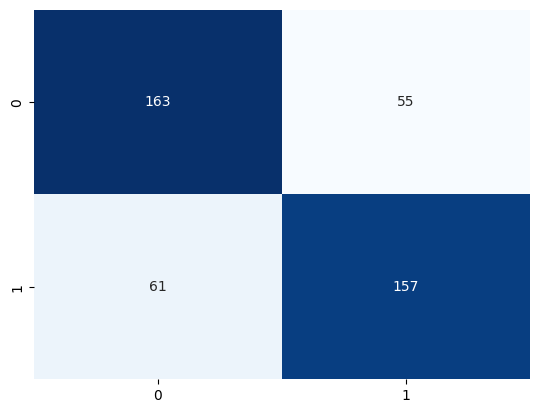

In [ ]:
cfm_log_balnew = confusion_matrix(y_testnew_bal, y_pred_log_balnew)
sns.heatmap(cfm_log_balnew, annot=True, fmt="d", cmap="Blues", cbar=False)

In [ ]:
print(classification_report(y_testnew_bal, y_pred_log_balnew))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       218
           1       0.74      0.72      0.73       218

    accuracy                           0.73       436
   macro avg       0.73      0.73      0.73       436
weighted avg       0.73      0.73      0.73       436



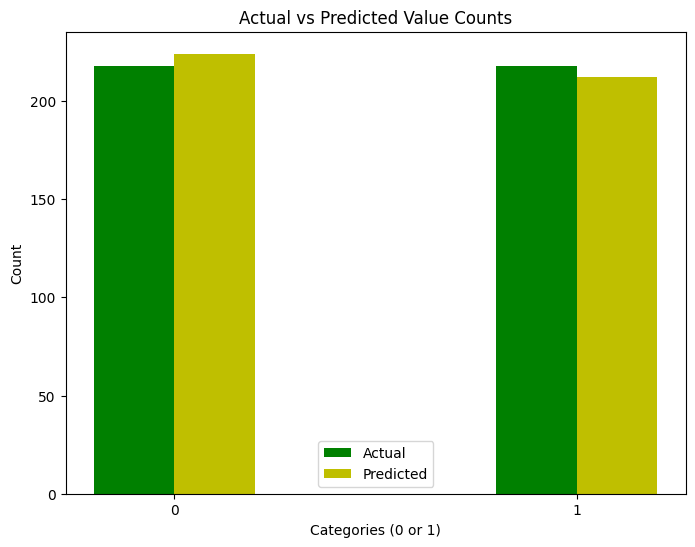

In [ ]:
categories = [0, 1]
actual_counts = [sum(y_testnew_bal == cat) for cat in categories]
predicted_counts = [sum(y_pred_log_balnew == cat) for cat in categories]

plt.figure(figsize=(8, 6))
bar_width = 0.2  #
x = range(len(categories))

plt.bar(x, actual_counts, width=bar_width, label='Actual', color='g')

plt.bar([p + bar_width for p in x], predicted_counts, width=bar_width, label='Predicted', color='y')

plt.xticks([p + bar_width/2 for p in x], categories)
plt.xlabel("Categories (0 or 1)")
plt.ylabel("Count")
plt.title("Actual vs Predicted Value Counts")
plt.legend()


plt.show()

### Support Vector Machine

In [ ]:
svmModel_balnew = svm.SVC(kernel='linear')
svmModel_balnew.fit(X_trainnew_bal, y_trainnew_bal)

SVC(kernel='linear')

In [ ]:
pred_svm_balnew = svmModel_balnew.predict(X_testnew_bal)
accSVM_balnew = accuracy_score(y_testnew_bal, pred_svm_balnew)
print(accSVM_balnew)

0.768348623853211


<Axes: >

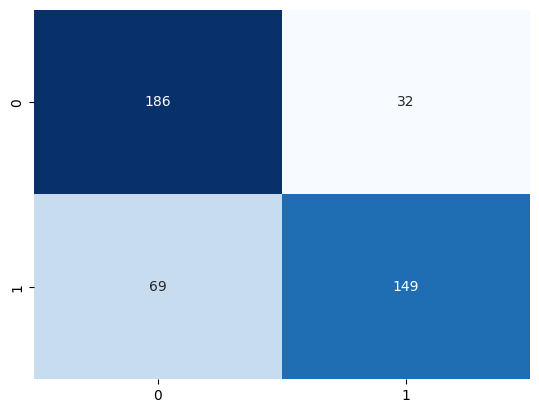

In [ ]:
cfm_svm_balnew = confusion_matrix(y_testnew_bal, pred_svm_balnew)
sns.heatmap(cfm_svm_balnew, annot=True, fmt="d", cmap="Blues", cbar=False)

In [ ]:
print(classification_report(y_testnew_bal, pred_svm_balnew))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       218
           1       0.82      0.68      0.75       218

    accuracy                           0.77       436
   macro avg       0.78      0.77      0.77       436
weighted avg       0.78      0.77      0.77       436



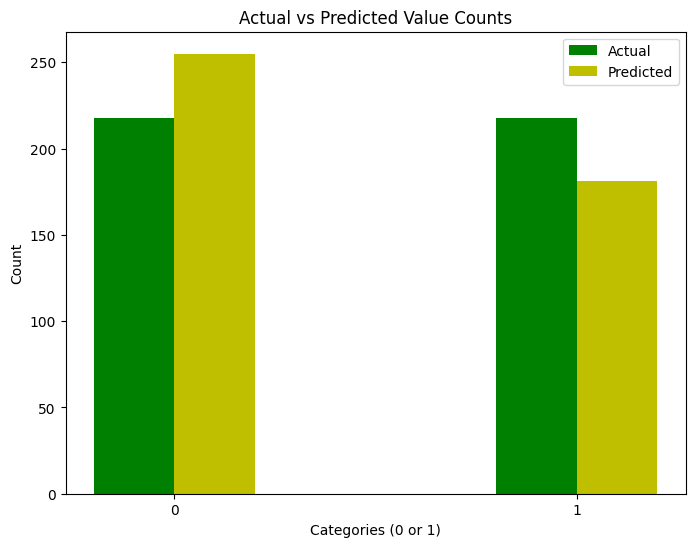

In [ ]:
categories = [0, 1]
actual_counts = [sum(y_testnew_bal == cat) for cat in categories]
predicted_counts = [sum(pred_svm_balnew == cat) for cat in categories]

plt.figure(figsize=(8, 6))
bar_width = 0.2  #
x = range(len(categories))

plt.bar(x, actual_counts, width=bar_width, label='Actual', color='g')

plt.bar([p + bar_width for p in x], predicted_counts, width=bar_width, label='Predicted', color='y')

plt.xticks([p + bar_width/2 for p in x], categories)
plt.xlabel("Categories (0 or 1)")
plt.ylabel("Count")
plt.title("Actual vs Predicted Value Counts")
plt.legend()


plt.show()

### Decision Trees

In [ ]:
def train_decision_tree_balnew(X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    #classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    #confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Visualization
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Create bar plots for Actual vs. Predicted
    categories = [0, 1]  # Assumes binary classification (0 and 1)
    actual_counts = [sum(y_test == cat) for cat in categories]
    predicted_counts = [sum(y_pred == cat) for cat in categories]

    # Bar plot for actual vs predicted
    plt.figure(figsize=(8, 6))
    bar_width = 0.35  #
    x = range(len(categories))

    # Plot actual values
    plt.bar(x, actual_counts, width=bar_width, label='Actual', color='b')

    # Plot predicted value
    plt.bar([p + bar_width for p in x], predicted_counts, width=bar_width, label='Predicted', color='r')

    plt.xticks([p + bar_width/2 for p in x], categories)
    plt.xlabel("Categories (0 or 1)")
    plt.ylabel("Count")
    plt.title("Actual vs Predicted Value Counts")
    plt.legend()


    plt.show()

    return model, y_pred, accuracy

Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72       218
           1       0.74      0.60      0.66       218

    accuracy                           0.69       436
   macro avg       0.70      0.69      0.69       436
weighted avg       0.70      0.69      0.69       436


Confusion Matrix:
[[172  46]
 [ 88 130]]


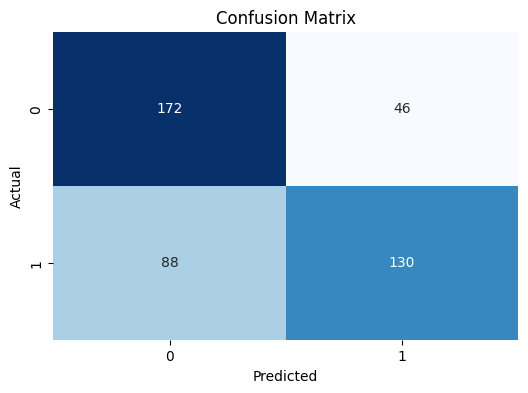

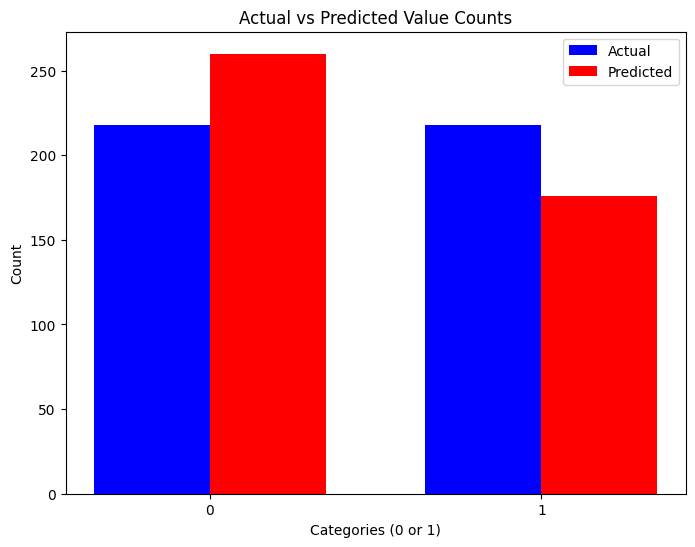

(DecisionTreeClassifier(random_state=42),
 array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,

In [ ]:
train_decision_tree_balnew(X_trainnew_bal, X_testnew_bal, y_trainnew_bal, y_testnew_bal)

### Random Forest Classifier

In [ ]:
# Train the model on the training data
rand_model_balnew = RandomForestClassifier(n_estimators=100, random_state=42)
rand_model_balnew.fit(X_trainnew_bal, y_trainnew_bal)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred_class_balnew = rand_model_balnew.predict(X_testnew_bal)
y_pred_class_balnew

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,

In [ ]:
# Evaluate the model performance
accuracy_rf_balnew = accuracy_score(y_testnew_bal, y_pred_class_balnew)
conf_matrix_balnew = confusion_matrix(y_testnew_bal, y_pred_class_balnew)
class_report_balnew = classification_report(y_testnew_bal, y_pred_class_balnew)

print(f"Accuracy: {accuracy_rf_balnew * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix_balnew)
print("Classification Report:\n", class_report_balnew)

Accuracy: 79.36%
Confusion Matrix:
 [[199  19]
 [ 71 147]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.91      0.82       218
           1       0.89      0.67      0.77       218

    accuracy                           0.79       436
   macro avg       0.81      0.79      0.79       436
weighted avg       0.81      0.79      0.79       436



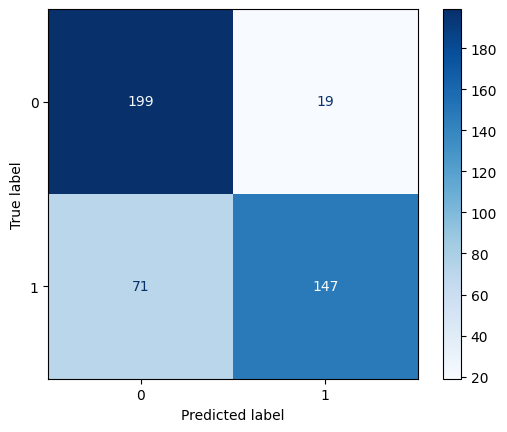

In [ ]:
# Plot confusion matrix
disp_balnew = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_balnew )
disp_balnew.plot(cmap=plt.cm.Blues)


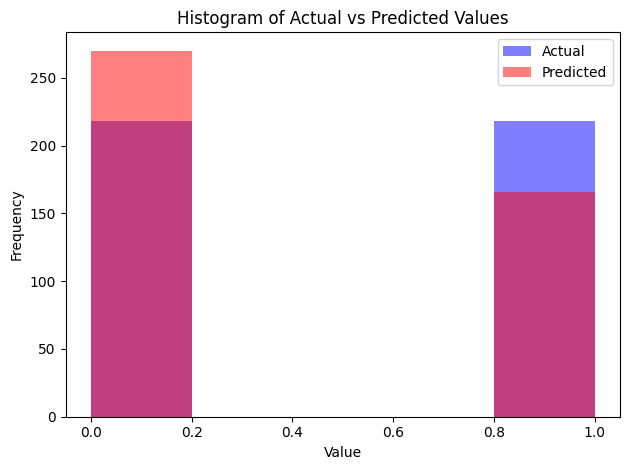

In [ ]:
plt.hist(y_testnew_bal, bins=5, alpha=0.5, label='Actual', color='blue')

# Histogram for predicted values
plt.hist(y_pred_class_balnew, bins=5, alpha=0.5, label='Predicted', color='red')

# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Labels')
plt.title('Histogram of Actual vs Predicted Values')

# Adding legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Comparing all accuracies

In [ ]:
X = ['Standard','Balanced','FeatureSelection + Balanced']

In [ ]:
StandardData = [86.08, 84.24, 77, 82.05]
Balanced = [77.29, 77.98, 79, 87.84]
FeatureBalanced = [73.39, 76.83, 69, 79.36]
LogRegL = [86.08, 77.29, 72.39]
SVML = [84.24, 77.98, 76.83]
DTL = [77, 79, 69]
RFL = [82.05, 87.84, 79.36]

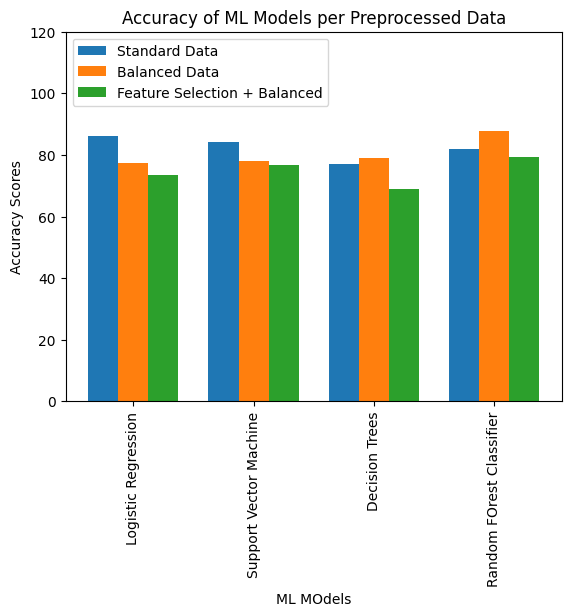

In [ ]:
N = 4
ind = np.arange(N)
width = 0.25

StandardData = [86.08, 84.24, 77, 82.05]
bar1 = plt.bar(ind, StandardData, width)

Balanced = [77.29, 77.98, 79, 87.84]
bar2 = plt.bar(ind+width, Balanced, width)

FeatureBalanced = [73.39, 76.83, 69, 79.36]
bar3 = plt.bar(ind+width*2, FeatureBalanced, width)

plt.xlabel("ML Models")
plt.ylabel('Accuracy Scores')
plt.title("Accuracy of ML Models per Preprocessed Data")
ax = plt.gca()
# ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 120])
plt.xticks(ind+width,['LogReg', 'SVM', 'Decision Trees', 'Rand Forest'])
plt.legend( (bar1, bar2, bar3), ('Standard Data', 'Balanced Data', 'Feature Selection + Balanced'), loc='upper left' )
plt.show()

-------------------------------------------------------------------------------------------------------------------------

Logistic Regression

In [ ]:
data = df2
data['Attrition'] = data['Attrition'].replace({'No':0,'Yes':1})
data['OverTime'] = data['OverTime'].map({'No':0,'Yes':1})
data['Gender'] = data['Gender'].map({'Male':0,'Female':1})

from sklearn.preprocessing import LabelEncoder
encoding_cols=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
label_encoders = {}
for column in encoding_cols:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])



<ipython-input-99-a0192c58bc9c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Attrition'] = data['Attrition'].replace({'No':0,'Yes':1})


In [ ]:
X = data.drop(['Attrition','Over18'], axis=1)
y = data['Attrition'].values

from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
rus = RandomOverSampler(random_state = 42)
X_over, y_over = rus.fit_resample(X,y)
print(Counter(y_over))

Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1972, 33)
(1972,)
(494, 33)
(494,)


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
from sklearn.impute import SimpleImputer
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
prediction=logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test,prediction)
print("Accuracy Score -", accuracy_score(y_test , prediction))

Accuracy Score - 0.742914979757085


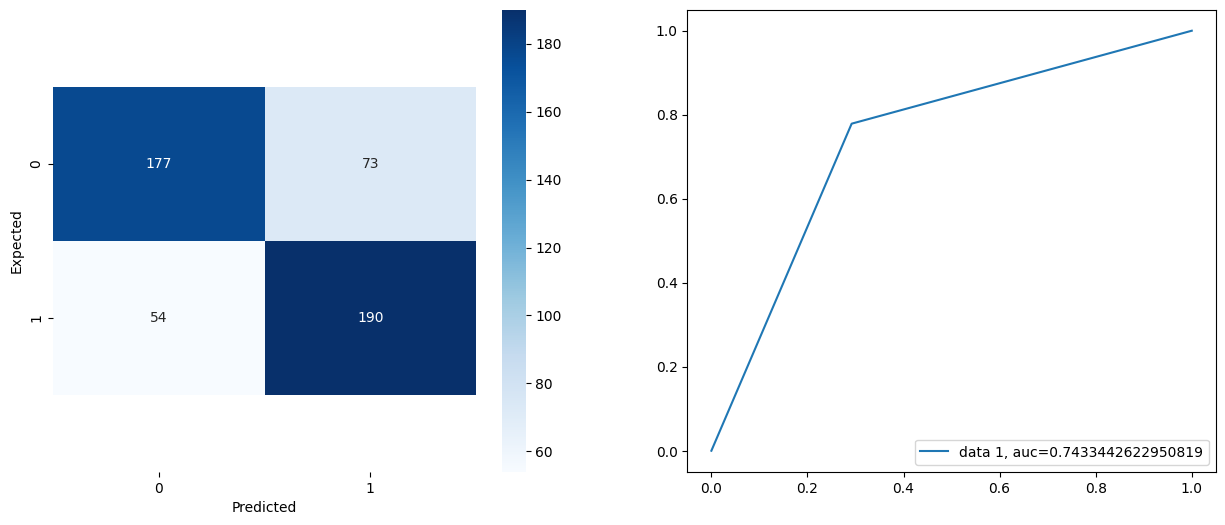

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues', fmt = 'd')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Expected')

ax2 = fig.add_subplot(1,2,2)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  prediction)
auc = roc_auc_score(y_test, prediction)
ax2 = plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import preprocessing

def train_and_evaluate_logistic_regression():
    # Load dataset
    data = pd.read_csv('hr_employee.csv')



    data['Attrition'] = data['Attrition'].replace({'No':0,'Yes':1})
    data['OverTime'] = data['OverTime'].map({'No':0,'Yes':1})
    data['Gender'] = data['Gender'].map({'Male':0,'Female':1})

    from sklearn.preprocessing import LabelEncoder
    encoding_cols=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
    label_encoders = {}
    for column in encoding_cols:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

    X = data.drop(['Attrition','Over18'], axis=1)
    y = data['Attrition'].values

    from collections import Counter
    from imblearn.over_sampling import RandomOverSampler
    rus = RandomOverSampler(random_state = 42)
    X_over, y_over = rus.fit_resample(X,y)
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

    from sklearn.preprocessing import StandardScaler
    import numpy as np
    import warnings
    from sklearn.impute import SimpleImputer
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)




    # Split into training and test sets (80% Train, 20% Test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the logistic regression model
    log_model = LogisticRegression(max_iter=1000)
    log_model.fit(X_train, y_train)

    # Make predictions
    y_pred_log = logreg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred_log)
    precision = precision_score(y_test, y_pred_log)
    recall = recall_score(y_test, y_pred_log)
    f1 = f1_score(y_test, y_pred_log)

    # Return evaluation metrics
    return accuracy, precision, recall, f1

if __name__ == "__main__":
    accuracy, precision, recall, f1 = train_and_evaluate_logistic_regression()
    print(f"Logistic Regression - Accuracy: {accuracy}")
    print(f"Logistic Regression - Precision: {precision}")
    print(f"Logistic Regression - Recall: {recall}")
    print(f"Logistic Regression - F1 Score: {f1}")


<ipython-input-105-770763a3d58e>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Attrition'] = data['Attrition'].replace({'No':0,'Yes':1})


UnboundLocalError: local variable 'X_train' referenced before assignment

In [ ]:
import pytest

def test_train_and_evaluate_logistic_regression():

    accuracy, precision, recall, f1 = train_and_evaluate_logistic_regression()


    assert 0 <= accuracy <= 1, "Accuracy is not between 0 and 1"
    assert 0 <= precision <= 1, "Precision is not between 0 and 1"
    assert 0 <= recall <= 1, "Recall is not between 0 and 1"
    assert 0 <= f1 <= 1, "F1 Score is not between 0 and 1"


    assert accuracy >= 0.5, "Accuracy is below 0.5, which might indicate a poorly performing model"

if __name__ == "__main__":
    pytest.main()


Visualisation of LOGISTIC MODEL

In [ ]:

# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.5, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
y_pred = logreg.predict(X_test)
errors = y_test - y_pred
# Plotting the errors
plt.figure(figsize=(10, 6))
plt.plot(range(len(errors)), errors, marker='o', linestyle='', color='red', label='Prediction Error')
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Error (Actual - Predicted)')
plt.title('Prediction Error Plot')
plt.legend()
plt.grid(True)
plt.show()
